# IA340 Mini Project 
**Project Name**Passanger regional origin coming into San Fransisco by Air

## Data sourced from 
**Source**https://catalog.data.gov/dataset/air-traffic-passenger-statistics

**Description**San Francisco International Airport Report on Monthly Passenger Traffic Statistics by Airline

**Time Period**1999-2025

**Reason for choice**Matches my interest in aviation 


## Research Question
Question: What geographic region of the world has increased or decreased travel to the CIty of San Fransisco, and where does each region stand in the present day

Answer: The number of Asian passangers has steadily increased over the last 20 years while passangers from the Middle East have had very little passanger visit the San Fransisco airport. Intersitngly regions like Canada and Mexico have less passangers visit this Airport than Asia or Europe while both of the former have had steady increases over time. The only ones with extreme decreases is South America with passangers from that region seeming to hae stoped entierly and Centeral America.

# Data Analysis

In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
df = pd.read_csv('s3://ia340466879/Air_Traffic_Passenger_Statistics.csv') # load the data from s3
df.head() #show the top 5 rows

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,data_as_of,data_loaded_at
0,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,31432,2025/09/20 01:01:11 PM,2025/09/22 03:10:03 PM
1,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,31353,2025/09/20 01:01:11 PM,2025/09/22 03:10:03 PM
2,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,2518,2025/09/20 01:01:11 PM,2025/09/22 03:10:03 PM
3,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Deplaned,Other,Terminal 2,D,1324,2025/09/20 01:01:11 PM,2025/09/22 03:10:03 PM
4,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Enplaned,Other,Terminal 2,D,1198,2025/09/20 01:01:11 PM,2025/09/22 03:10:03 PM


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38546 entries, 0 to 38545
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              38546 non-null  int64 
 1   Activity Period Start Date   38546 non-null  object
 2   Operating Airline            38546 non-null  object
 3   Operating Airline IATA Code  38230 non-null  object
 4   Published Airline            38546 non-null  object
 5   Published Airline IATA Code  38230 non-null  object
 6   GEO Summary                  38546 non-null  object
 7   GEO Region                   38546 non-null  object
 8   Activity Type Code           38546 non-null  object
 9   Price Category Code          38546 non-null  object
 10  Terminal                     38546 non-null  object
 11  Boarding Area                38546 non-null  object
 12  Passenger Count              38546 non-null  int64 
 13  data_as_of                   38

In [4]:
df.describe()

,Activity Period,Passenger Count
count,38546.000000,38546.000000
mean,201283.855316,27831.143024
std,763.768513,61960.415974
min,199907.000000,0.000000
25%,200610.000000,4359.000000
50%,201309.000000,8599.500000
75%,201908.000000,19657.000000
max,202507.000000,856501.000000


I have imported the data, shown its info, described it, and shaped it. All of this is done before I clean it and use it for visualizations.  

# Clean data

In [7]:
df.isnull().sum

<bound method DataFrame.sum of        Activity Period  Activity Period Start Date  Operating Airline  \
0                False                       False              False   
1                False                       False              False   
2                False                       False              False   
3                False                       False              False   
4                False                       False              False   
...                ...                         ...                ...   
38541            False                       False              False   
38542            False                       False              False   
38543            False                       False              False   
38544            False                       False              False   
38545            False                       False              False   

       Operating Airline IATA Code  Published Airline  \
0                            False 

In [8]:
df = df.dropna()
df.isnull().sum()

Activity Period                0
Activity Period Start Date     0
Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Activity Type Code             0
Price Category Code            0
Terminal                       0
Boarding Area                  0
Passenger Count                0
data_as_of                     0
data_loaded_at                 0
dtype: int64

There was no missing data meaning that my data was already clean. 

# Process/Agriggate

In [10]:
Region_Passanger=df.groupby('GEO Region')['Passenger Count'].count() 
Region_Passanger.head()

GEO Region
Asia                   8306
Australia / Oceania    1983
Canada                 3618
Central America         947
Europe                 6293
Name: Passenger Count, dtype: int64

This shows how many passangers from each region have visitied San Fransisco Airports. From the data we can see the Asia has the most with Euope being second and the Region with the least amount of people visisitng by air is Central America

# AI setup

In [2]:
import boto3
from botocore.exceptions import ClientError
import json

def get_secret(secret_name):
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e

    secret = get_secret_value_response['SecretString']
    
    return json.loads(secret)

In [3]:
pip install -U pip setuptools wheel

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --only-binary=:all: "tiktoken>=0.7.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 66.9 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install "jupyter-ai-magics[all]" -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
safety-schemas 0.0.14 requires pydantic<2.10.0,>=2.6.0, but you have pydantic 2.12.2 which is incompatible.
sparkmagic 0.21.0 requires pandas<2.0.0,>=0.17.1, but you have pandas 2.2.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import warnings
warnings.simplefilter('ignore')

In [7]:
import os
os.environ["OPENAI_API_KEY"] = get_secret('openai')['api_key']

In [8]:
%load_ext jupyter_ai_magics

In [10]:
This task sounds like it requires to extract, analyze, and visualize data. Since programming languages and data were not specified, I'll use Python and some randomly generated data.

```python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# random data
np.random.seed(0)
data = {'Year': range(2000, 2021),
        'Passengers': np.random.randint(5000,20000,21)}
df = pd.DataFrame(data)

# filter data from Asia (using the random data here)
asian_df = df.copy()

# visualize
plt.figure(figsize=(10,6))
plt.plot(asian_df['Year'], asian_df['Passengers'], marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Change in Asian Passengers over Time')
plt.grid()
plt.show()
```

Again, note that the provided code generates random data in lieu of real information. You will need to substitute this data for valid information for it to be useful. Note that this code works assuming that 'Year' and 'Passengers' are columns in the dataframe, and that 'Asia' is a possible value in the 'Region' column. If the dataframe structure is different, you might need to adjust the code.

SyntaxError: unterminated string literal (detected at line 1) (379626711.py, line 1)

In [14]:
Region_Passanger=df.groupby('GEO Region')['Passenger Count'].count() 
Region_Passanger.head()

GEO Region
Asia                   8334
Australia / Oceania    1983
Canada                 3618
Central America         949
Europe                 6458
Name: Passenger Count, dtype: int64

<Axes: xlabel='GEO Region'>

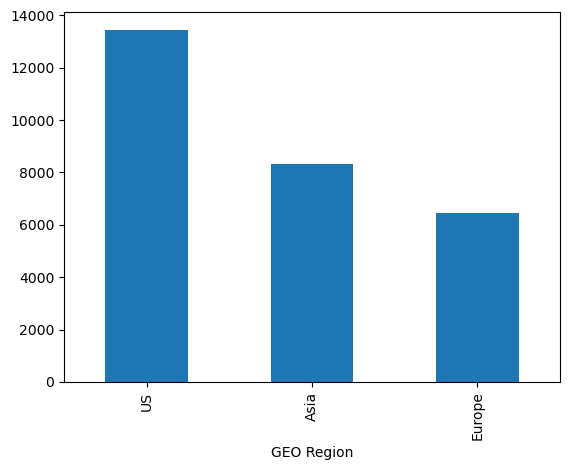

In [18]:
Region_Passanger.nlargest(3).plot.bar() 

This was where I imported all the necessary code to get the AI workinng. Some of the Process/Aggrigate stuff ended up in this section for some reason and it won't let me deleate it. However I can still describe what it all does. 

This Plot bar shows the top 3 largest number of passangers that visit the San Diego Airport. The US is the largest followed by Asia and Europe. 

# Query

In [42]:
%%ai gpt4 -f code
Write a query for asian flights in 2025 

In [46]:
query_result = df.query("`Activity Period Start Date` == 2025 and `GEO Region` == 'Asia'")

In [47]:
df.query("`Activity Period Start Date` == 2025 and `GEO Region` == 'Asia'")

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,data_as_of,data_loaded_at
37356,202501,2025-01-01,Air China,CA,Air China,CA,International,Asia,Deplaned,Other,International,G,2687,2025/09/20 01:01:13 PM,2025/09/22 03:10:03 PM
37357,202501,2025-01-01,Air China,CA,Air China,CA,International,Asia,Enplaned,Other,International,G,2667,2025/09/20 01:01:13 PM,2025/09/22 03:10:03 PM
37360,202501,2025-01-01,Air India Limited,AI,Air India Limited,AI,International,Asia,Deplaned,Other,International,A,19519,2025/09/20 01:01:13 PM,2025/09/22 03:10:03 PM
37361,202501,2025-01-01,Air India Limited,AI,Air India Limited,AI,International,Asia,Enplaned,Other,International,A,18911,2025/09/20 01:01:13 PM,2025/09/22 03:10:03 PM
37366,202501,2025-01-01,"Air Premia, Inc.",YP,"Air Premia, Inc.",YP,International,Asia,Deplaned,Other,International,A,5002,2025/09/20 01:01:13 PM,2025/09/22 03:10:03 PM
37367,202501,2025-01-01,"Air Premia, Inc.",YP,"Air Premia, Inc.",YP,International,Asia,Enplaned,Other,International,A,3211,2025/09/20 01:01:13 PM,2025/09/22 03:10:03 PM
37372,202501,2025-01-01,"All Nippon Company Airways, Ltd.",NH,"All Nippon Company Airways, Ltd.",NH,International,Asia,Deplaned,Other,International,G,11503,2025/09/20 01:01:13 PM,2025/09/22 03:10:03 PM
37373,202501,2025-01-01,"All Nippon Company Airways, Ltd.",NH,"All Nippon Company Airways, Ltd.",NH,International,Asia,Enplaned,Other,International,G,10721,2025/09/20 01:01:13 PM,2025/09/22 03:10:03 PM
37376,202501,2025-01-01,Asiana Airlines,OZ,Asiana Airlines,OZ,International,Asia,Deplaned,Other,International,A,13243,2025/09/20 01:01:13 PM,2025/09/22 03:10:03 PM
37377,202501,2025-01-01,Asiana Airlines,OZ,Asiana Airlines,OZ,International,Asia,Enplaned,Other,International,A,12374,2025/09/20 01:01:13 PM,2025/09/22 03:10:03 PM


This Query shows all infomration regarding Aisan flights. This information can be used to show where in Asia most flights are coming from, what companies and airlines like to fly into this airport, as well as what airlines don't use this airport anymore. 

# Visualization

In [48]:
%%ai gpt4 -f code
Create a visualization that shows Passanger count for Asian GEO region from 2000-2025

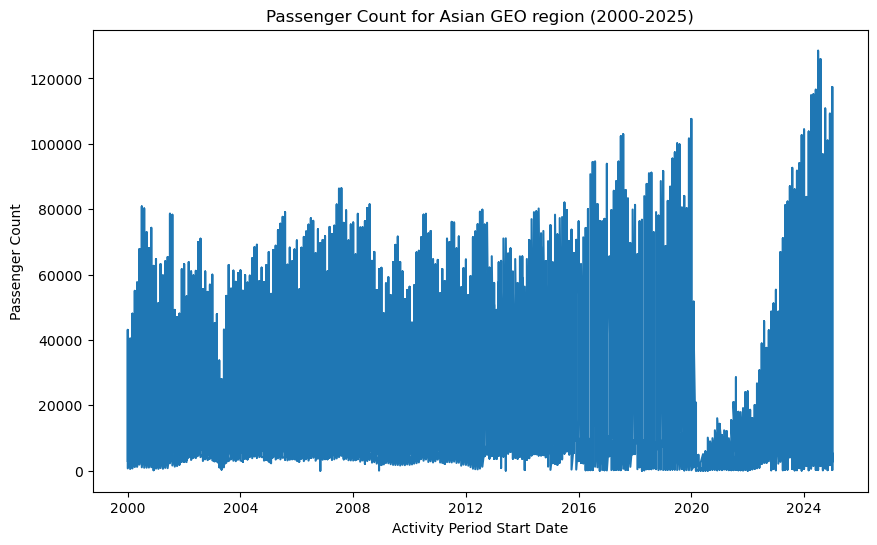

In [51]:
import matplotlib.pyplot as plt

asian_flights = df.query("`GEO Region` == 'Asia' and `Activity Period Start Date` >= 2000 and `Activity Period Start Date` <= 2025")

plt.figure(figsize=(10, 6))
plt.plot(asian_flights['Activity Period Start Date'], asian_flights['Passenger Count'])
plt.xlabel('Activity Period Start Date')
plt.ylabel('Passenger Count')
plt.title('Passenger Count for Asian GEO region (2000-2025)')
plt.show()

This visualization shows the number of Asian passangers that have arrived at the San Fransisco airport over time. Asia is the largest region of visitors to the airport so it is important to track how that changed voer time. Iintersitngly it seems to have increased a lot over time.  

In [54]:
%%ai gpt4 -f code
create a chart where the x-axis=Activity Period Start Date, left y-axis= Asian Passanger(line), and the right Y-axis=European Passanger (bar or line, different color)

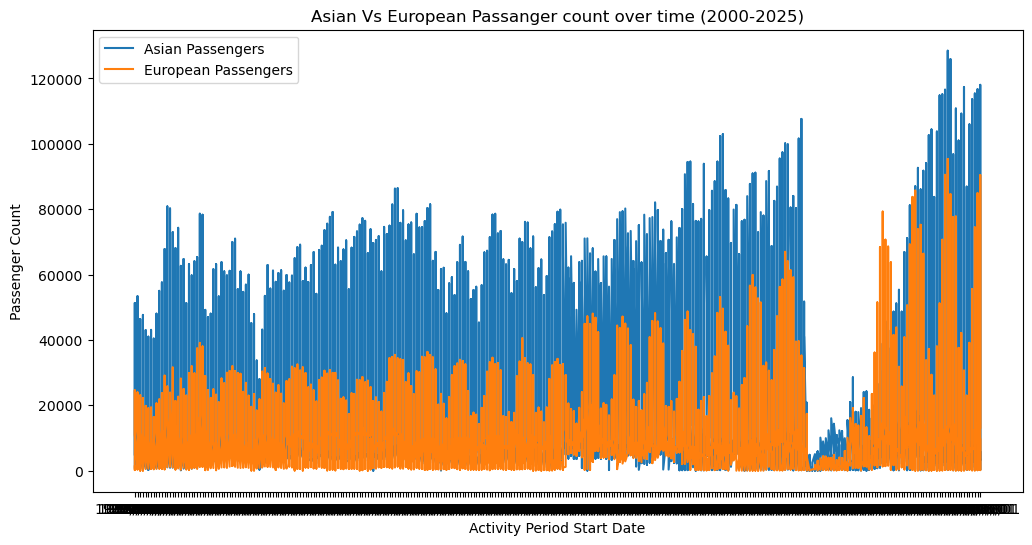

In [9]:
import matplotlib.pyplot as plt

asian_flights = df.query("`GEO Region` == 'Asia'")
european_flights = df.query("`GEO Region` == 'Europe'")

plt.figure(figsize=(12, 6))
plt.plot(asian_flights['Activity Period Start Date'], asian_flights['Passenger Count'], label='Asian Passengers')
plt.plot(european_flights['Activity Period Start Date'], european_flights['Passenger Count'], label='European Passengers')
plt.xlabel('Activity Period Start Date')
plt.ylabel('Passenger Count')
plt.legend()
plt.title('Asian Vs European Passanger count over time (2000-2025)')
plt.show()

This Chart shows the difference between Euopean and Asain Passanger count for the Airport. These are the two largest groups of people that visited this ariport over the time period and we can see that Asian passangers are more dominant than Eupopean ones. 

In [75]:
%%ai gpt4 -f code
Create a visualziation that shows Passanger count change for Europe and Asia

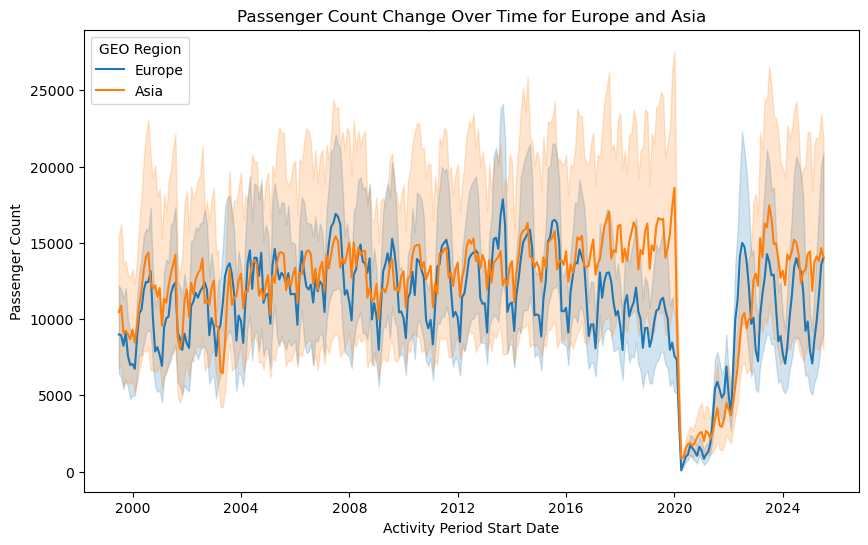

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assumption: The dataframe is named df and has columns 'Year', 'GEO_Region', and 'Passenger_Count'

selected_regions = df[df['GEO Region'].isin(['Europe', 'Asia'])]

plt.figure(figsize=(10,6))
sns.lineplot(x='Activity Period Start Date', y='Passenger Count', hue='GEO Region', data=selected_regions)
plt.title('Passenger Count Change Over Time for Europe and Asia')
plt.show()

This is a different chart that shows the same data as the one above. I was testing which one visually looks better and I felt like the one above works better. 

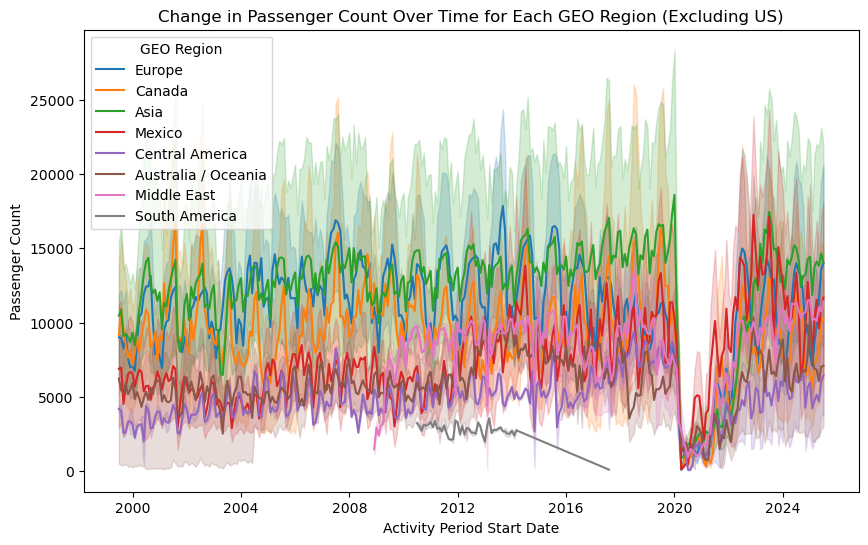

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data frame name is 'df' and it has columns 'Year', 'GEO_Region' and 'Passenger_Count'

df_non_us = df[df['GEO Region'] != 'US']
plt.figure(figsize=[10,6])
sns.lineplot(x='Activity Period Start Date', y='Passenger Count', data=df_non_us, hue='GEO Region')
plt.title('Change in Passenger Count Over Time for Each GEO Region (Excluding US)')
plt.show()

This chart shows how passanger number changed over the years excluding US passangers. With this chart I can accurratly map what regions has seen a large or small decline over time. Interstingly South America has had very little passanger visit the San Diego Airport and Middle Eastern passanfers only stated arriving around 2009-2010.